# This is an email spam and ham detection model using Logistic Regression

## Importing necessary libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #text to numeric data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('mail_data.csv')

## Data Cleaning...
#### Replacing the null values with blank space

In [15]:
data = df.where((pd.notnull(df)),'')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

## Data encoding

In [16]:
data.loc[data['Category']=='spam','Category'] = 0
data.loc[data['Category']=='ham','Category'] = 1

In [17]:
X=data['Message']
Y=data['Category']

In [ ]:
# printing spam or ham
print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [44]:
df.shape

(5572, 2)

In [45]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

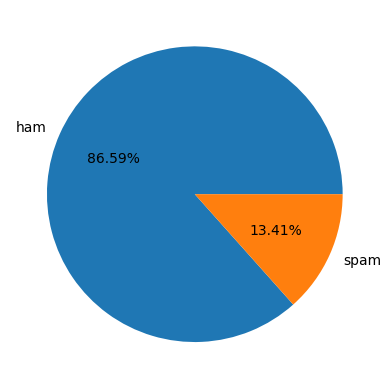

In [46]:
plt.pie((df['Category'].value_counts()),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

## Model Building

In [49]:
X_train, X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=3)

In [50]:
# training
feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [51]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [52]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [53]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [54]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [55]:
print('Accuracy on training data: ',accuracy_on_training_data)

Accuracy on training data:  0.9670181736594121


In [57]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)


In [58]:
print('Accuracy on test data: ',accuracy_on_test_data)

Accuracy on test data:  0.9659192825112107


In [59]:
input_your_mail = ["This is Aryan Maurya from MNNIT ALLAHABD, this email is to remind you that you have not returned the books for last 3 weeks."]

input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
# print(prediction)

if  prediction==0:
  print("This email is SPAM !!")
else:
  print("This email is HAM !!")

This email is HAM !!
